In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing pandas,numpy,matplotlib

In [2]:
def jaccard_similarity(str1,str2):
    set1=set(str1)#converting strings
    set2=set(str2)#into set of unique characters
    intersection=set1.intersection(set2)#taking intersection
    union=set1.union(set2)#taking union
    return (len(intersection)/len(union))

Using jaccard similarity algorithm.The Jaccard similarity coefficient, also known as the Jaccard index, is a measure
of similarity between two sets. It is defined as the size of the intersection of the two sets divided by the size of the union of the two sets. The Jaccard similarity coefficient ranges from 0, indicating that the two sets have no elements in common, to 1, indicating that the
two sets are identical.

In [3]:
task=pd.read_csv("TaskData.csv")

reading the data provided of TaskData.csv

In [4]:
task.head()


,Career
0,cokter
1,dentiists
2,Enginir
3,PoLICE
4,engneiear


In [5]:
career_options = ["Doctor", "Dentist", "Engineer", "Police", "Nurse",
    "Teacher","Architect", "Accountant", "Pharmacist","Lawyer"]
def correct_spelling(misspelled_word):
    max_similarity= 0
    closest_word = ""
    
    for option in career_options:
        similarity = jaccard_similarity(misspelled_word.lower(), option.lower())
        if similarity > max_similarity:
            max_similarity = similarity
            closest_word = option
    
    return closest_word

Create a list of correctly spelled career words (the target words). Calculate the Jaccard similaroty between a misspelled word and each word on the target list. The target word with the maximum similarity is likely the intended word.

In [6]:
correct_task=[correct_spelling(word) for word in task.Career]
final_task=pd.DataFrame(correct_task,columns=['Career'])
final_task.to_csv('correct_task.csv',index=False)

we create a new csv file that contains the correct spellings of the career

In [7]:
def count_multiple_word_occurrences(word_list):
    word_count = {}  # Initialize an empty dictionary to store word counts
    for word in word_list:  # Iterate through each word in the list
        if word in word_count:  # Check if the word is already in the dictionary
            word_count[word] += 1  # Increment the count if it is
        else:
            word_count[word] = 1  # Initialize the count to 1 if it isn't
    return word_count  # Return the dictionary with word counts

counts = count_multiple_word_occurrences(correct_task)
print(counts)

{'Doctor': 210, 'Dentist': 192, 'Engineer': 330, 'Police': 162, 'Nurse': 83, 'Teacher': 213, 'Architect': 60, 'Accountant': 32, 'Pharmacist': 42, 'Lawyer': 82}


here we create a function to count the frequency of occurence of a word by creating a new dictionary

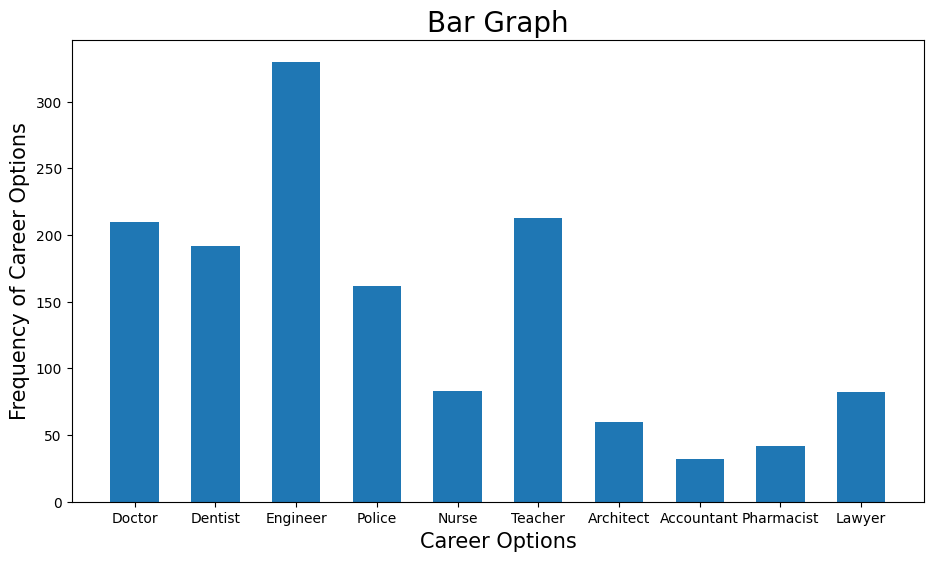

In [8]:
plt.figure(figsize=(11,6))
plt.xlabel("Career Options",fontsize=15)
plt.ylabel("Frequency of Career Options",fontsize=15)
plt.title("Bar Graph",fontsize=20)
plt.bar(career_options,counts.values(),width=0.6)
plt.show()

Plotting the bar graph